## Hello! This notebook will be used for my capstone project.

In [65]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [3]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## INTRODUCTION

According to the car accident data, we will seek to predict the severity of an eventual collision in some place according to certain characteristics, in order to place warning signs for all drivers who pass through those areas.

## DATA

The data that will be used will be: the type of street (ADDRTYPE), the track conditions (ROADCON), the brightness of the place (LIGHTCOND) and the severity of the incident (SEVERITYCODE). To predict the severity of a place, the decision tree will be used. For which we will use 4 weather conditions with the highest number of incidents, 4 types of brightness in the area with the highest number of incidents, we will clean the data by eliminating the rows with null data and other data that we will not need at work. It will seek to catalog the areas according to the severity of accidents and to place warning signs to slow down.

In [4]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [30]:
print(pd.unique(df['ADDRTYPE']))
print(pd.unique(df['ROADCOND']))
print(pd.unique(df['LIGHTCOND']))
df.replace(['Unknown','Other','Ice','Snow/Slush','Sand/Mud/Dirt','Standing Water','Oil','Dark - Street Lights On','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'],np.nan,inplace=True)

['Intersection' 'Block' 'Alley']
['Wet' 'Dry' 'Snow/Slush' 'Ice' 'Sand/Mud/Dirt' 'Standing Water' 'Oil']
['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Dusk'
 'Dawn' 'Dark - Street Lights Off' 'Dark - Unknown Lighting']


In [31]:
df.dropna(subset=['ADDRTYPE'],axis=0,inplace=True)
df.dropna(subset=['ROADCOND'],axis=0,inplace=True)
df.dropna(subset=['LIGHTCOND'],axis=0,inplace=True)

In [32]:
print(pd.unique(df['ADDRTYPE']))
print(pd.unique(df['ROADCOND']))
print(pd.unique(df['LIGHTCOND']))

['Intersection' 'Block' 'Alley']
['Wet' 'Dry']
['Daylight' 'Dusk' 'Dawn']


In [113]:
df_1 = df[['ROADCOND', 'ADDRTYPE', 'LIGHTCOND','SEVERITYCODE']]
df_1.reset_index(drop=True,inplace=True)
df_1.head()

,ROADCOND,ADDRTYPE,LIGHTCOND,SEVERITYCODE
0,Wet,Intersection,Daylight,2
1,Dry,Block,Daylight,1
2,Dry,Block,Daylight,1
3,Wet,Intersection,Daylight,2
4,Dry,Intersection,Daylight,1


In [114]:
df_1['SEVERITYCODE'] = df_1['SEVERITYCODE'].astype('str')
df_1.dtypes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ROADCOND        object
ADDRTYPE        object
LIGHTCOND       object
SEVERITYCODE    object
dtype: object

In [115]:
df_1.head()

,ROADCOND,ADDRTYPE,LIGHTCOND,SEVERITYCODE
0,Wet,Intersection,Daylight,2
1,Dry,Block,Daylight,1
2,Dry,Block,Daylight,1
3,Wet,Intersection,Daylight,2
4,Dry,Intersection,Daylight,1


In [117]:
X = df_1[['ROADCOND', 'ADDRTYPE', 'LIGHTCOND']].values

le_ROAD = preprocessing.LabelEncoder()
le_ROAD.fit([ 'Wet', 'Dry'])
X[:,0] = le_ROAD.transform(X[:,0])

le_ADDR = preprocessing.LabelEncoder()
le_ADDR.fit(['Intersection','Block','Alley'])
X[:,1] = le_ADDR.transform(X[:,1]) 

le_LIGHT = preprocessing.LabelEncoder()
le_LIGHT.fit([ 'Daylight', 'Dusk','Dawn'])
X[:,2] = le_LIGHT.transform(X[:,2]) 

X[0:5]

array([[1, 2, 1],
       [0, 1, 1],
       [0, 1, 1],
       [1, 2, 1],
       [0, 2, 1]], dtype=object)

In [118]:
y = df_1['SEVERITYCODE']
y[0:5]

0    2
1    1
2    1
3    2
4    1
Name: SEVERITYCODE, dtype: object

In [119]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=2)

In [120]:
accidentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
accidentTree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [121]:
accidentTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [122]:
predTree = accidentTree.predict(X_testset)

In [123]:
print (predTree [0:5])
print (y_testset [0:5])

['1' '1' '1' '1' '1']
44618     1
114541    2
64247     2
111722    1
80047     2
Name: SEVERITYCODE, dtype: object


In [124]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6603552932004232


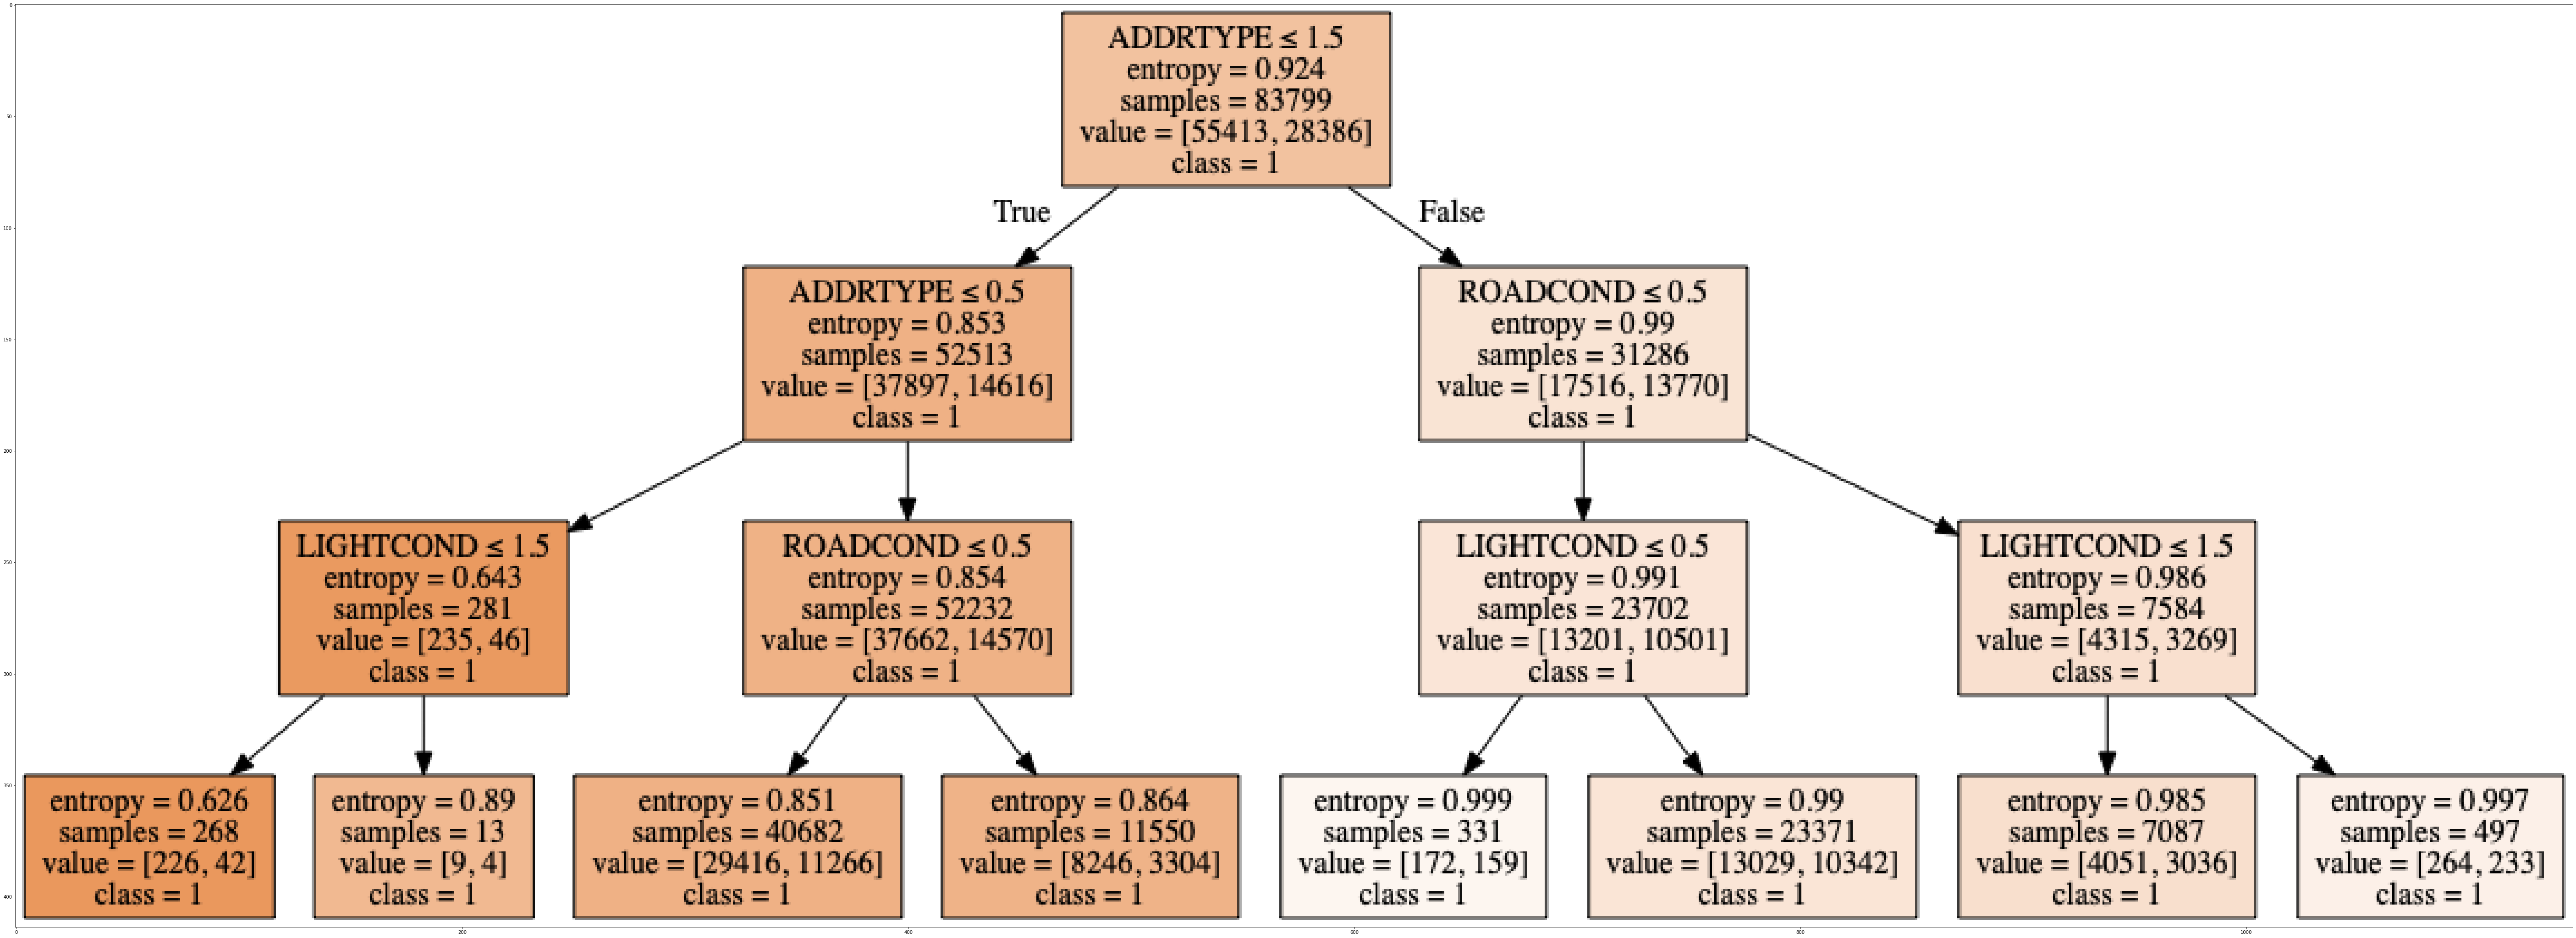

In [125]:
dot_data = StringIO()
filename = "accident_tree.png"
featureNames = df_1.columns[0:3]
targetNames = df_1["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(accidentTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')